In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.integrate import simps


In [20]:
sun_data = pd.read_csv('/Users/physarah/Development/lumos-sat/lumos/data/seds/extra_solar.csv')

rband_data = pd.read_table('/Users/physarah/Development/lumos-sat/lumos/data/bandpass/huntsman/sloan_r.txt')

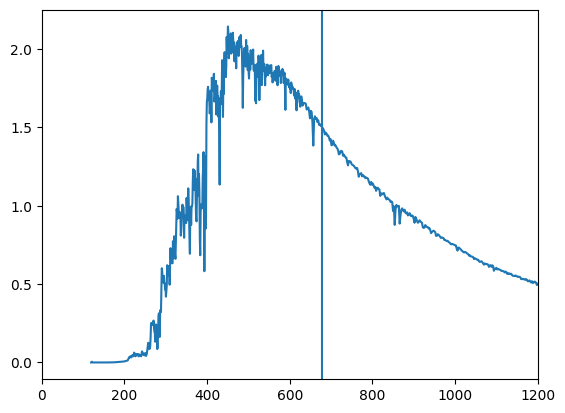

In [177]:
sun_wmnm = (list(sun_data['E-490 W/m2/micron'])*u.W*u.m**-2*u.micron**-1).to(u.W*u.m**-2*u.nanometer**-1)
sun_nm = (list(sun_data['Wavelength, microns'])*u.micron).to(u.nanometer)

plt.plot(sun_nm, sun_wmnm)
plt.axvline(678.863495542836)
plt.xlim(0,1200)

y2_interpolated = np.interp(rband_data['wavelength'], sun_nm.value, sun_wmnm.value)

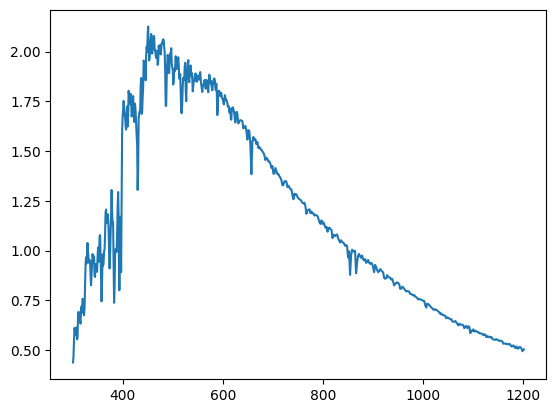

In [179]:
plt.plot(rband_data['wavelength'], y2_interpolated)

In [182]:
integrated = scipy.integrate.trapz(y2_interpolated, rband_data['wavelength'])

In [211]:
outs3 = scipy.integrate.trapz(y2_interpolated * rband_data['throughput'], rband_data['wavelength'])

In [213]:
log_val = outs3 * 600 * 1e-9/3.0 * 1e8 * 3631e-26

In [214]:
log_val

1.670527400121572e-19

In [216]:
ab_mag = -2.5 * np.log10(log_val)
ab_mag

46.94286599158811

In [163]:
integrated = scipy.integrate.cumtrapz(y2_interpolated[0:1201] * sun_wmnm[0:1201], dx=sun_nm[0:1200])

In [166]:
integrated[-1]/678.863495542836

<Quantity 162.73920705 nm>

In [172]:
np.sqrt(np.trapz(sun_nm[0:1201] * sun_wmnm[0:1201])/np.trapz(sun_wmnm[0:1201]/sun_nm[0:1201]))

<Quantity 646.80534576 nm>

In [171]:
np.sqrt(np.trapz(sun_nm[0:1201] * sun_wmnm[0:1201])/np.trapz(sun_wmnm[0:1201]/sun_nm[0:1201])

<Quantity 418357.155306 nm2>

In [83]:
y2_interpolated = np.interp(sun_data['Wavelength, microns'],rband_data['wavelength']*0.001, rband_data['throughput'])

values = y2_interpolated * u.dimensionless_unscaled * u.nanometer**-1
values_out = values.to(u.dimensionless_unscaled * u.micron**-1)

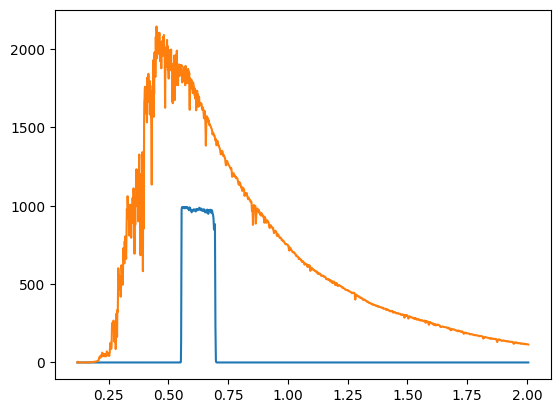

In [84]:
plt.plot(sun_data['Wavelength, microns'][0:1200], values_out[0:1200])
plt.plot(sun_data['Wavelength, microns'][0:1200], sun_data['E-490 W/m2/micron'][0:1200])

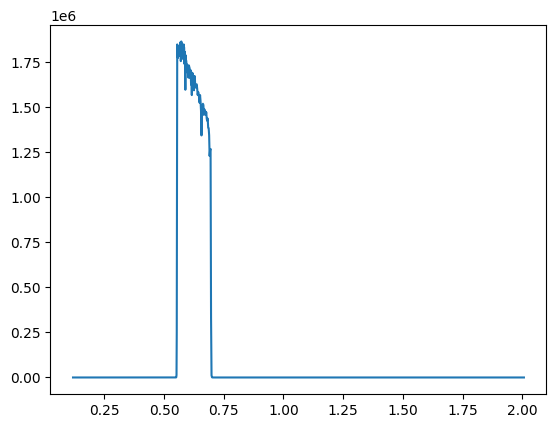

In [86]:
plt.plot(sun_data['Wavelength, microns'][0:1200], values_out[0:1200] * sun_data['E-490 W/m2/micron'][0:1200])

In [87]:
outs = np.trapz(values_out[0:1200] * sun_data['E-490 W/m2/micron'][0:1200])

In [88]:
import astropy.units as u

In [90]:
(outs* u.W * u.m**-2 * u.micron**-1)

<Quantity 1.81146297e+08 W / (m2 micron)>

In [74]:
outs = simps(sun_data['E-490 W/m2/micron'][0:1200])

In [77]:
(outs* u.W * u.m**-2 * u.micron**-1)/max(sun_data['Wavelength, microns'][0:1200])

<Quantity 451744.49302509 W / (m2 micron)>

In [78]:
max(sun_data['Wavelength, microns'][0:1200])

2.006

In [188]:
import sbpy

In [217]:
from sbpy.calib import Sun
from sbpy.photometry import bandpass
from sbpy.units import JMmag, VEGAmag

sun = Sun.from_default()
bp = bandpass('SDSS r')
fluxd = sun.observe(bp, unit=JMmag)

In [209]:
fluxd

<Magnitude -27.07753301 mag(VEGA)>

(0.0, 20000.0)

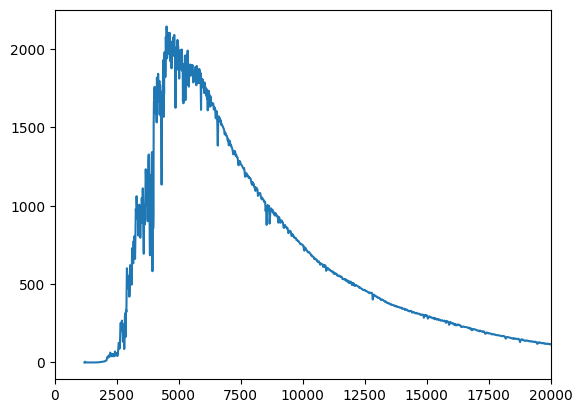

In [199]:
plt.plot(sun.wave, sun.fluxd)
plt.xlim(0,20000)

Help on function bandpass in module sbpy.photometry.bandpass:

bandpass(name)
    Retrieve bandpass transmission spectrum from sbpy.
    
    
    Parameters
    ----------
    name : string
        Name of the bandpass, case insensitive.  See notes for
        available filters.
    
    
    Returns
    -------
    bp : `~synphot.SpectralElement`
    
    
    Notes
    -----
    Available filters:
    
    +-------------+---------------------------+
    | Name        | Source                    |
    +=============+===========================+
    | 2MASS J     | Cohen et al. 2003         |
    +-------------+---------------------------+
    | 2MASS H     | Cohen et al. 2003         |
    +-------------+---------------------------+
    | 2MASS Ks    | Cohen et al. 2003         |
    +-------------+---------------------------+
    | ATLAS c     | Tonry et al. 2018         |
    +-------------+---------------------------+
    | ATLAS o     | Tonry et al. 2018         |
    +----------

In [207]:
help(sbpy.units)

Help on package sbpy.units in sbpy:

NAME
    sbpy.units - Common planetary astronomy units.

DESCRIPTION
    
    .. list-table:: Available Units
       :header-rows: 1
       :widths: 10 20 20 20 1
    
       * - Unit
         - Description
         - Represents
         - Aliases
         - SI Prefixes
    
       * - ``JM``
         - Johnson-Morgan magnitude system flux density zeropoint (Johnson et al 1966; Bessell & Murphy 2012).
         - :math:`\mathrm{1.0280163\,VEGA}`
         - ``JMflux``
         - No
    
       * - ``VEGA``
         - Spectral flux density of Vega.
         - 
         - ``VEGAflux``
         - No

PACKAGE CONTENTS
    core
    tests (package)

DATA
    JM = Unit("JM")
        Johnson-Morgan magnitude system flux density zeropoint (Johnson et al
        1966; Bessell & Murphy 2012).
    
    JMmag = Unit("mag(JM)")
        Johnson-Morgan magnitude system: Vega is 0.03 mag at all wavelengths (Johnson et al 1966; Bessell & Murphy 2012).
    
    VEGA = U

In [194]:
import pandas as pd

outs = pd.read_json('/Users/physarah/Desktop/sat_paths_updated_corrected_altitude2.json',lines=True)

In [195]:
df_flattened = outs.explode('sun_altitude')


In [196]:
df_flattened = pd.concat([outs[col].explode() for col in outs.columns], axis=1)


daytime = df_flattened[df_flattened['sun_altitude']>0]
nighttime = df_flattened[df_flattened['sun_altitude']<0]

(20.0, -15.0)

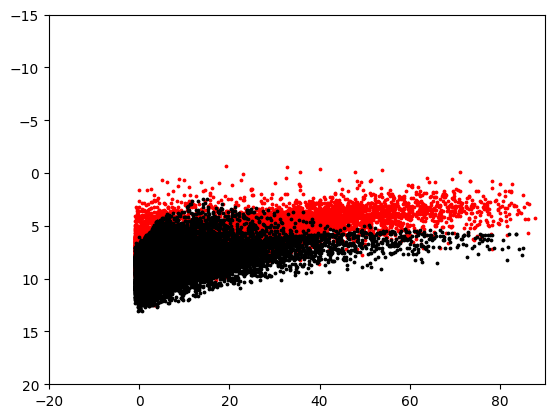

In [197]:
plt.scatter(x=daytime['sat_altitude'], y=daytime['magnitude'], s = 3, c='red')
plt.scatter(x=nighttime['sat_altitude'], y=nighttime['magnitude'], s = 3, c='black')

plt.xlim(-20,90)
plt.ylim(20,-15)

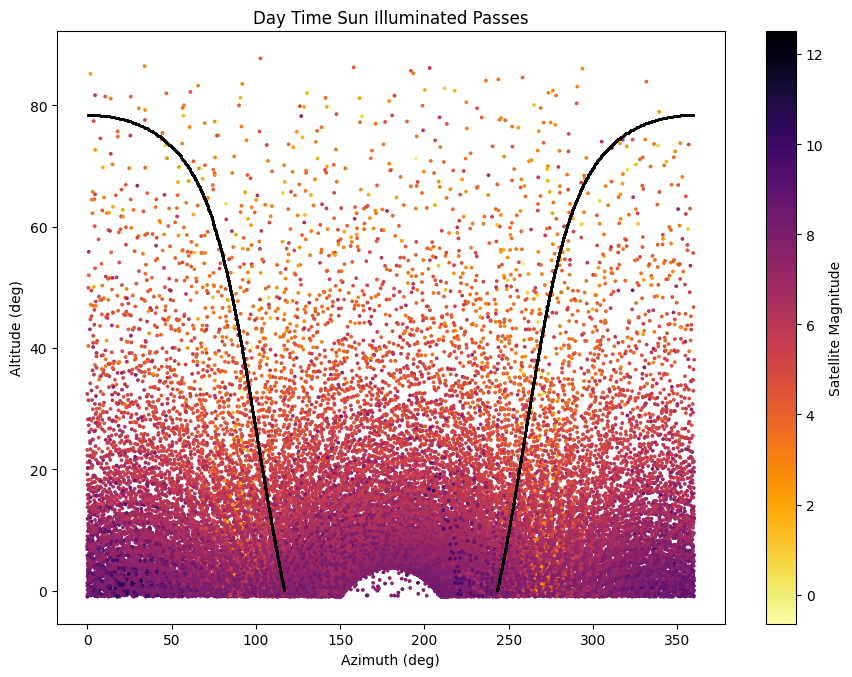

In [198]:
daytime_bright = daytime[daytime['magnitude']<30]

plt.figure(figsize = (14/1.3,10/1.3))
plt.scatter(y=daytime_bright['sat_altitude'], x=daytime_bright['sat_azimuth'], s = 3, c=daytime_bright['magnitude'], cmap = 'inferno_r')
#plt.scatter(y=nighttime['sat_altitude'], x=nighttime['sat_azimuth'], s = 0.1, c='black')
#plt.ylim(0,90)
plt.colorbar(label = "Satellite Magnitude")
#plt.clim(-15,15)
plt.scatter(daytime_bright['sun_azimuth'],daytime_bright['sun_altitude'], color = 'black', s = 0.1)
plt.ylabel("Altitude (deg)")
plt.xlabel("Azimuth (deg)")
plt.title("Day Time Sun Illuminated Passes")
plt.savefig('/Users/physarah/Desktop/day_pass2.png')

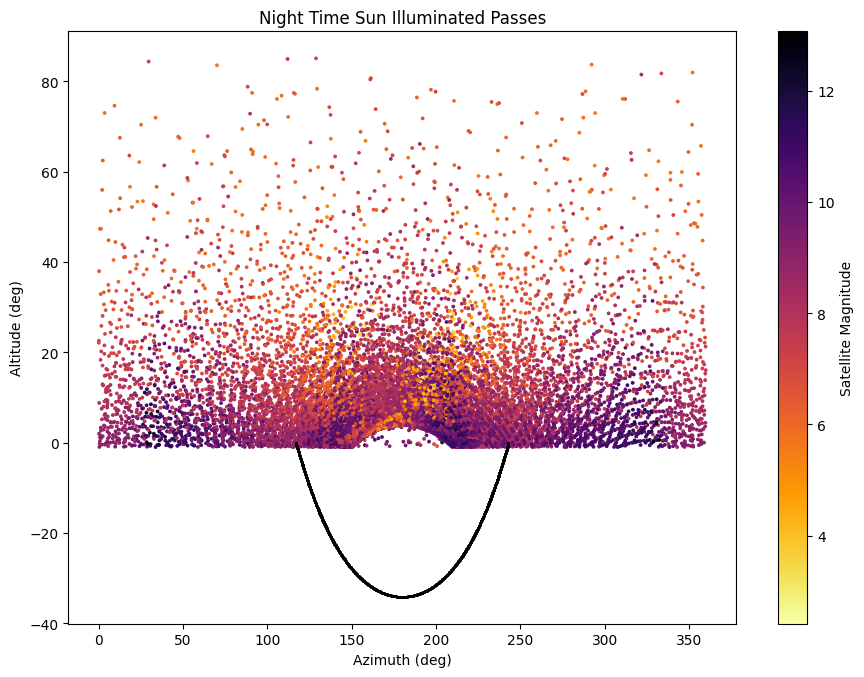

In [199]:
nighttime_bright = nighttime[nighttime['magnitude']<30]

plt.figure(figsize = (14/1.3,10/1.3))
plt.title("Night Time Sun Illuminated Passes")
plt.scatter(y=nighttime_bright['sat_altitude'], x=nighttime_bright['sat_azimuth'], s = 3, c=nighttime_bright['magnitude'], cmap = 'inferno_r')
#plt.scatter(y=nighttime['sat_altitude'], x=nighttime['sat_azimuth'], s = 0.1, c='black')
plt.colorbar(label = "Satellite Magnitude")
#plt.clim(-15,15)
plt.scatter(nighttime_bright['sun_azimuth'],nighttime_bright['sun_altitude'], color = 'black', s = 0.1)
plt.ylabel("Altitude (deg)")
plt.xlabel("Azimuth (deg)")
plt.savefig('/Users/physarah/Desktop/night_pass3.png')
#plt.ylim(0,90)


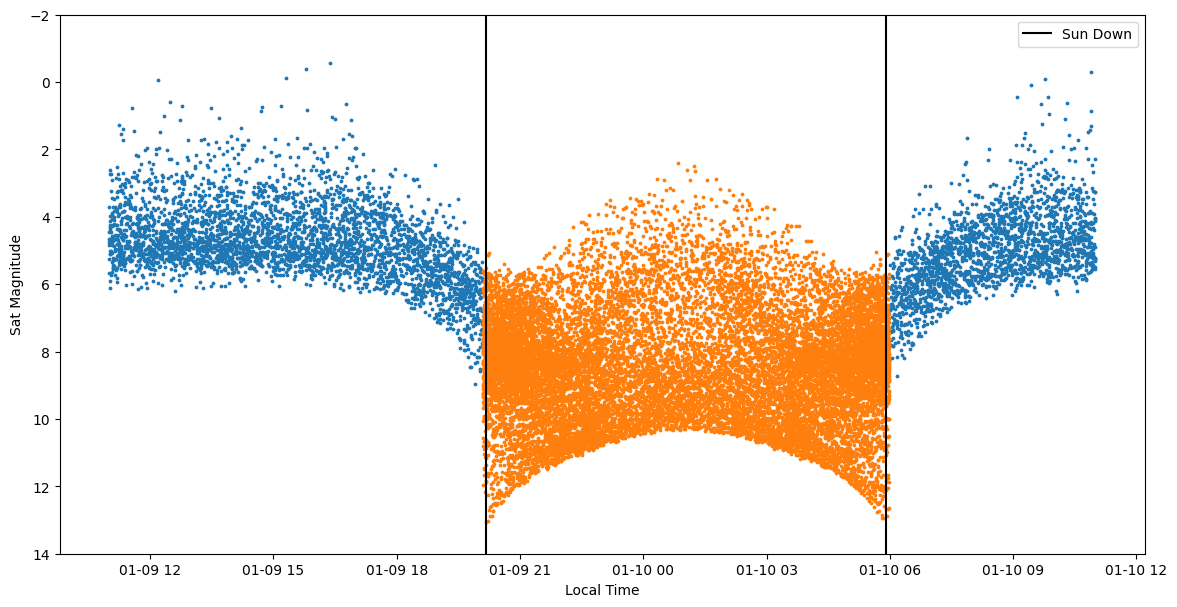

In [205]:
daytime_bright = daytime_bright[daytime_bright['sat_altitude']>20]

plt.figure(figsize=(14,7))
plt.scatter(y=daytime_bright['magnitude'], x=pd.to_datetime(daytime_bright['times']) + timedelta(hours = 11), s = 3)
plt.axvline(datetime(year = 2024, month = 1, day = 9, hour = 20, minute=10), color = 'black')
plt.axvline(datetime(year = 2024, month = 1, day = 10, hour = 5, minute=55), color = 'black', label = 'Sun Down')
plt.scatter(y=nighttime_bright['magnitude'], x=pd.to_datetime(nighttime_bright['times']) + timedelta(hours = 11), s = 3)

plt.legend()
plt.ylim(14,-2)
plt.ylabel("Sat Magnitude")
plt.xlabel("Local Time")
plt.savefig('/Users/physarah/Desktop/time_sats3.png')

In [201]:
from datetime import datetime, timedelta

pd.to_datetime(daytime_bright['times']) - timedelta(hours = 11)

0     2024-01-08 13:44:01+00:00
0     2024-01-08 13:45:01+00:00
0     2024-01-08 13:46:01+00:00
0     2024-01-08 15:22:01+00:00
0     2024-01-08 15:23:01+00:00
                 ...           
747   2024-01-09 08:34:01+00:00
747   2024-01-09 08:35:01+00:00
747   2024-01-09 08:36:01+00:00
747   2024-01-09 08:37:01+00:00
747   2024-01-09 08:38:01+00:00
Name: times, Length: 5577, dtype: datetime64[ns, UTC]

In [202]:
import lumos.calculator
import lumos.conversions
import lumos.constants

In [203]:
max_angle = np.arccos(lumos.constants.EARTH_RADIUS / 555*1000)

/var/folders/8p/5731jz1n2rb34n99zjc89td80000gn/T/ipykernel_83012/4177149795.py:1: RuntimeWarning: invalid value encountered in arccos
  max_angle = np.arccos(lumos.constants.EARTH_RADIUS / 555*1000)


In [191]:
lumos.constants.EARTH_RADIUS / 500*1000

12756000.0